<h1>1.Importing library</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection

from imblearn.over_sampling import SMOTE


<h1>2.Analyse Data from CSV</h1>

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.gender.value_counts

<bound method IndexOpsMixin.value_counts of 0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object>

In [9]:
df.shape

(5110, 12)

<h1>3. EDA and Feature Engineering</h1>

In [10]:
df['gender']

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object

In [11]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
stroke1 = df.loc[(df['stroke'] == 1)]
stroke0 = df.loc[(df['stroke'] == 0)]

In [13]:
stroke1 = df.loc[(df['stroke'] == 1)]

In [14]:
stroke1.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
48,35626,Male,81.0,0,0,Yes,Self-employed,Urban,99.33,33.7,never smoked,1
243,40460,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
24,4219,Male,71.0,0,0,Yes,Private,Urban,102.87,27.2,formerly smoked,1
160,50931,Female,76.0,0,0,Yes,Private,Urban,57.92,NaN,formerly smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [15]:
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [16]:
df['age'] = df['age'].astype(int)

In [17]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


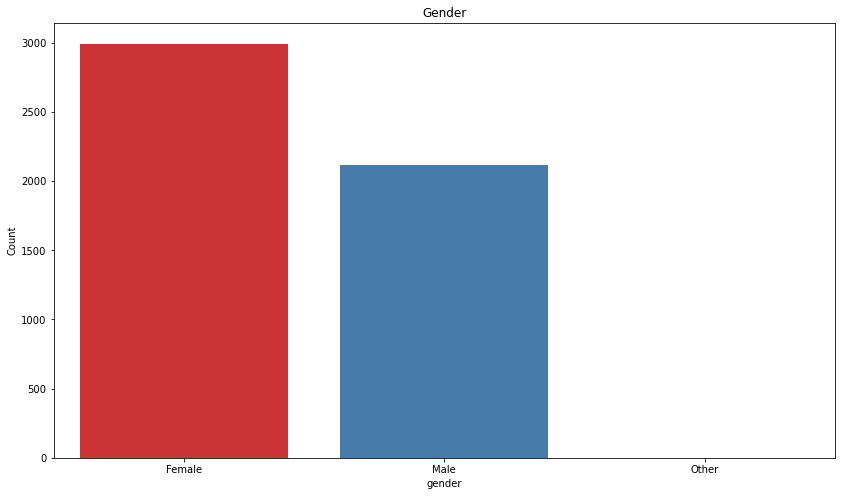

In [18]:
plt.figure(figsize=(14,8))
sns.countplot(df.sort_values('gender').gender,palette='Set1')
plt.ylabel('Count')
plt.title('Gender')
plt.show()

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


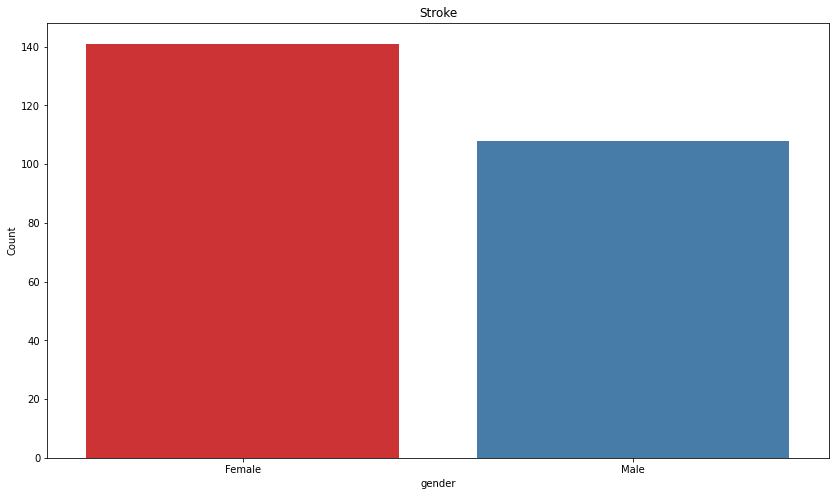

In [19]:
plt.figure(figsize=(14,8))
sns.countplot(stroke1.sort_values('gender').gender,palette='Set1')
plt.ylabel('Count')
plt.title('Stroke')
plt.show()

In [20]:
stroke1['gender'].value_counts()

Female    141
Male      108
Name: gender, dtype: int64

In [21]:
stroke1['age'].value_counts(ascending=False)

78.00    21
80.00    17
79.00    17
81.00    14
57.00    11
76.00    10
68.00     9
74.00     9
63.00     9
82.00     9
77.00     8
59.00     8
71.00     7
58.00     7
72.00     6
61.00     6
70.00     6
75.00     6
54.00     6
69.00     6
66.00     4
60.00     4
51.00     4
73.00     4
65.00     3
64.00     3
50.00     3
39.00     3
49.00     3
56.00     3
45.00     3
67.00     3
55.00     2
38.00     2
53.00     2
48.00     2
52.00     2
47.00     1
43.00     1
42.00     1
1.32      1
46.00     1
32.00     1
14.00     1
Name: age, dtype: int64

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


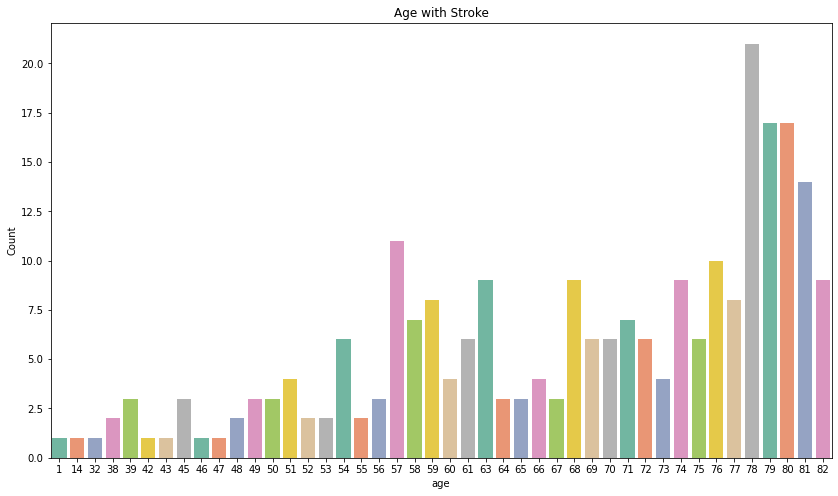

In [22]:
plt.figure(figsize=(14,8))
sns.countplot(stroke1.sort_values('age').age.astype(int),palette='Set2')
plt.ylabel('Count')
plt.title('Age with Stroke')
plt.show()

In [23]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [24]:
stroke1.hypertension.value_counts()

0    183
1     66
Name: hypertension, dtype: int64

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


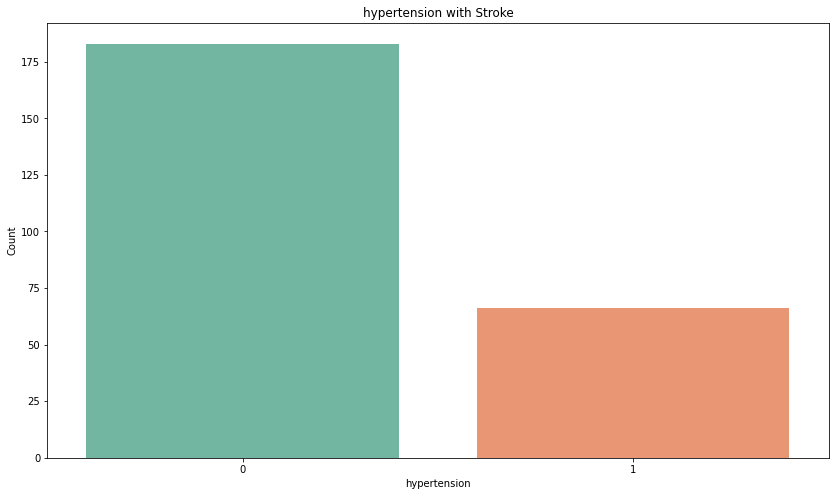

In [25]:
plt.figure(figsize=(14,8))
sns.countplot(stroke1.sort_values('hypertension').hypertension,palette='Set2')
plt.ylabel('Count')
plt.title('hypertension with Stroke')
plt.show()

In [26]:
stroke1.heart_disease.value_counts()

0    202
1     47
Name: heart_disease, dtype: int64

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


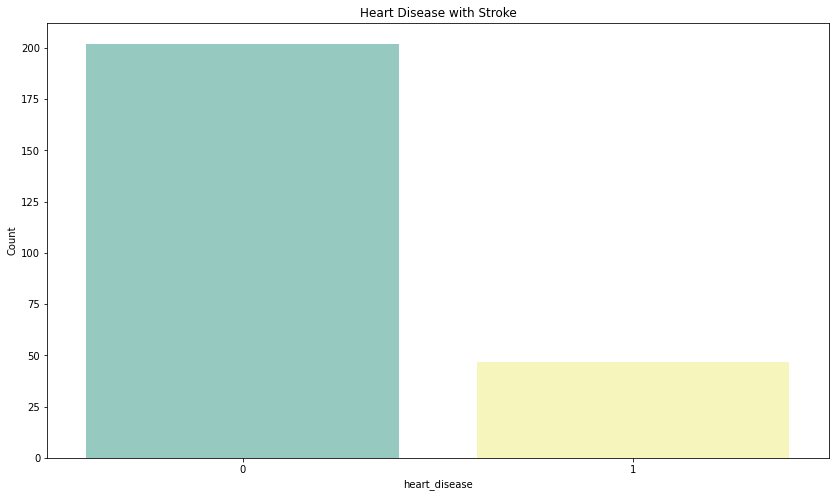

In [27]:
plt.figure(figsize=(14,8))
sns.countplot(stroke1.sort_values('heart_disease').heart_disease,palette='Set3')
plt.ylabel('Count')
plt.title('Heart Disease with Stroke')
plt.show()

In [28]:
stroke1.ever_married.value_counts()

Yes    220
No      29
Name: ever_married, dtype: int64

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


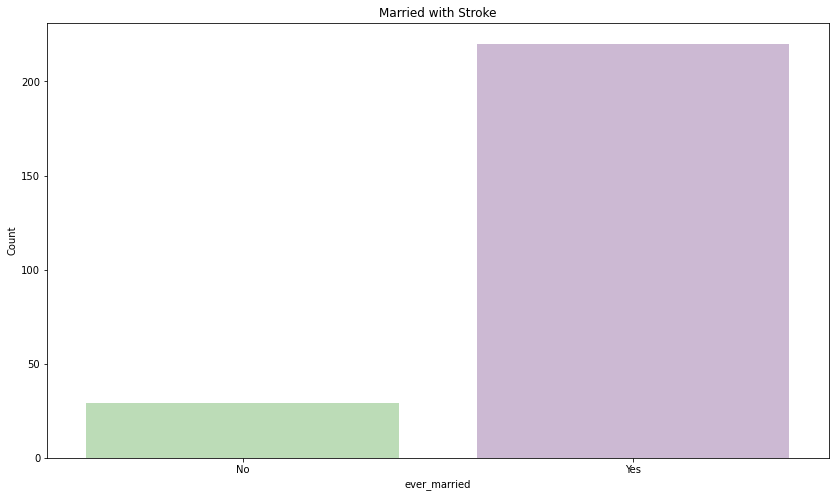

In [29]:
plt.figure(figsize=(14,8))
sns.countplot(stroke1.sort_values('ever_married').ever_married,palette='PRGn_r')
plt.ylabel('Count')
plt.title('Married with Stroke')
plt.show()

In [30]:
stroke1.work_type.value_counts()

Private          149
Self-employed     65
Govt_job          33
children           2
Name: work_type, dtype: int64

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


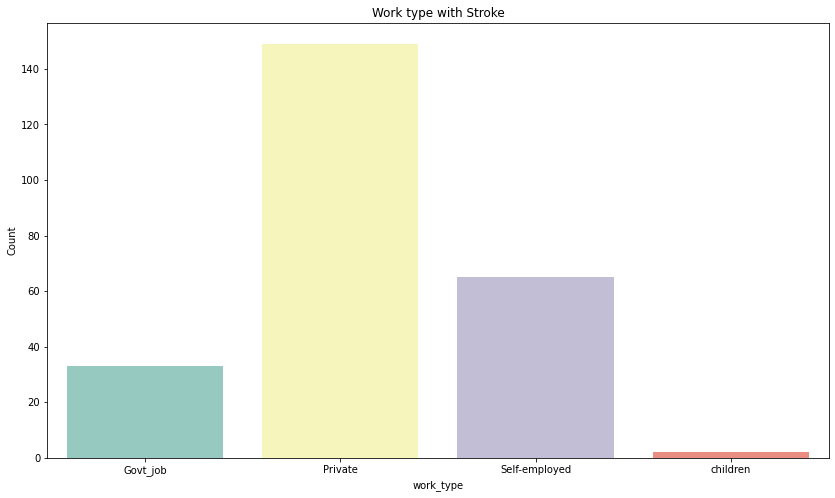

In [31]:
plt.figure(figsize=(14,8))
sns.countplot(stroke1.sort_values('work_type').work_type,palette='Set3')
plt.ylabel('Count')
plt.title('Work type with Stroke')
plt.show()

In [32]:
stroke1.avg_glucose_level.value_counts(ascending=False)

101.45    2
228.69    1
60.94     1
74.02     1
57.92     1
         ..
86.94     1
98.55     1
226.98    1
72.81     1
78.81     1
Name: avg_glucose_level, Length: 248, dtype: int64

Text(0.5, 1.0, 'Average Glucose Level With Stroke')

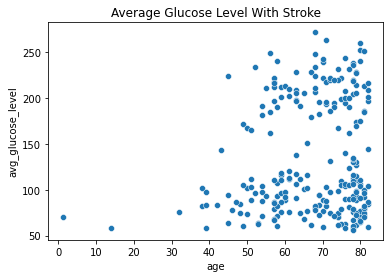

In [33]:
sns.scatterplot(data=stroke1, x="age", y="avg_glucose_level")
plt.title('Average Glucose Level With Stroke')

In [34]:
blood140less = stroke1.loc[(stroke1['avg_glucose_level'] < 140)]
blood140199 = stroke1.loc[(stroke1['avg_glucose_level'] > 140) & (stroke1['avg_glucose_level'] < 200)]
blood200over = stroke1.loc[(stroke1['avg_glucose_level'] > 199)]

In [35]:
print('Total Non Diabeties Patients with stroke :' , blood140less['avg_glucose_level'].count())

Total Non Diabeties Patients with stroke : 156


In [36]:
print('Total Prediabetes Patients with stroke : ', blood140199['avg_glucose_level'].count())

Total Prediabetes Patients with stroke :  37


In [37]:
print('Total Diabetes Patients with stroke : ', blood200over['avg_glucose_level'].count())

Total Diabetes Patients with stroke :  59


Text(0.5, 1.0, 'BMI With Stroke')

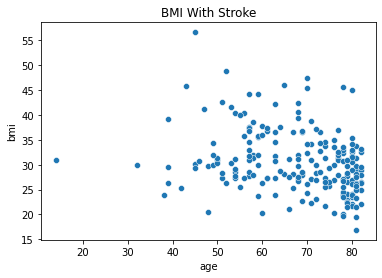

In [38]:
sns.scatterplot(data=stroke1, x="age", y="bmi")
plt.title('BMI With Stroke')

In [39]:
underweight = stroke1.loc[(stroke1['bmi'] < 18.5)]
healthy = stroke1.loc[(stroke1['bmi'] > 18.4) & (stroke1['bmi'] < 25.0)]
overweight = stroke1.loc[(stroke1['bmi'] > 24.9) & (stroke1['bmi'] < 30)]
obese = stroke1.loc[(stroke1['bmi'] > 30)]

In [40]:
print('Total Underweight Patients with stroke : ', underweight['bmi'].count())

Total Underweight Patients with stroke :  1


In [41]:
print('Total healthy Patients with stroke : ', healthy['bmi'].count())

Total healthy Patients with stroke :  35


In [42]:
print('Total overweight Patients with stroke : ', overweight['bmi'].count())

Total overweight Patients with stroke :  75


In [43]:
print('Total obese Patients with stroke : ', obese['bmi'].count())

Total obese Patients with stroke :  96


In [44]:
stroke1.Residence_type.value_counts()

Urban    135
Rural    114
Name: Residence_type, dtype: int64

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


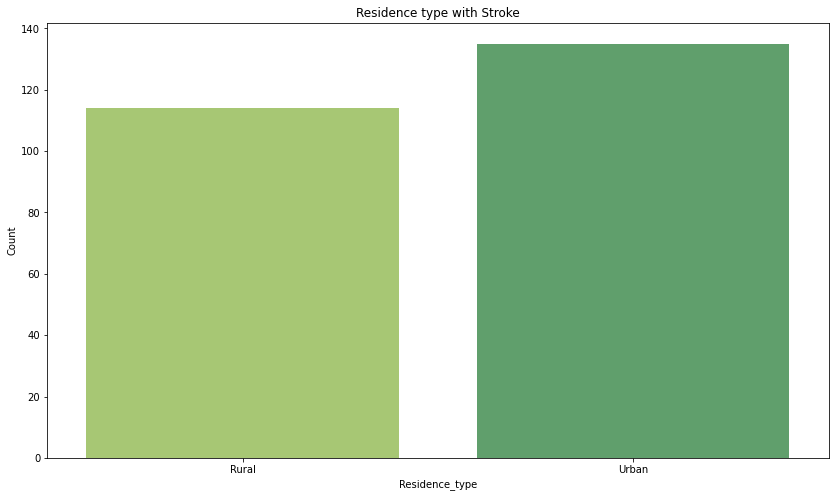

In [45]:
plt.figure(figsize=(14,8))
sns.countplot(stroke1.sort_values('Residence_type').Residence_type,palette='summer_r')
plt.ylabel('Count')
plt.title('Residence type with Stroke')
plt.show()

In [46]:
stroke1.smoking_status.value_counts()

never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: smoking_status, dtype: int64

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


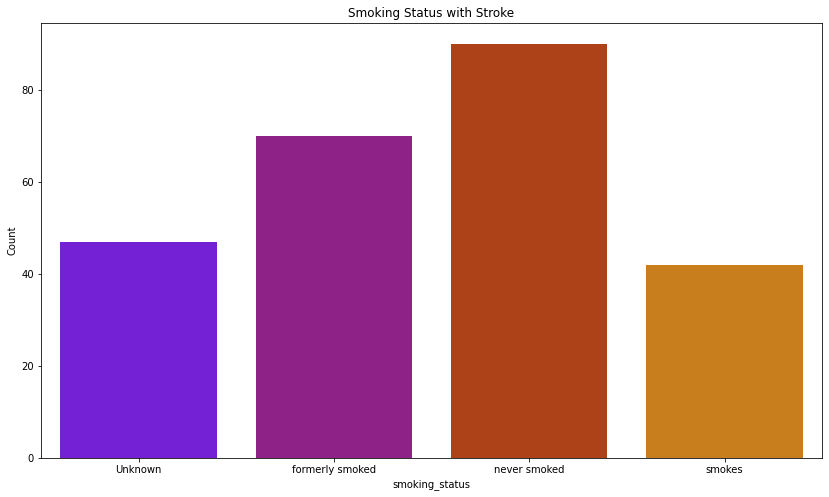

In [47]:
plt.figure(figsize=(14,8))
sns.countplot(stroke1.sort_values('smoking_status').smoking_status,palette='gnuplot')
plt.ylabel('Count')
plt.title('Smoking Status with Stroke')
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int32  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 459.2+ KB


In [49]:
df.duplicated().sum()

0

In [50]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
bmi,201,0.039335
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000


In [77]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [79]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:>

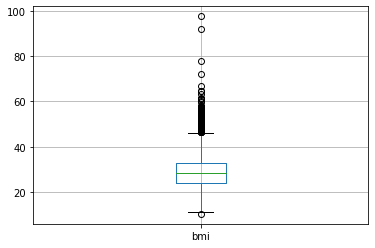

In [53]:
df.boxplot(column='bmi')

<AxesSubplot:>

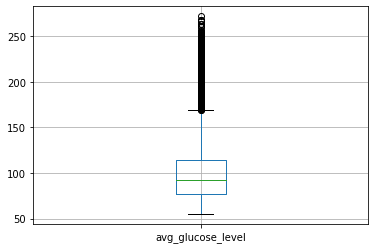

In [54]:
df.boxplot(column='avg_glucose_level')

In [55]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [56]:
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])

In [57]:
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender
df['work_type']=work_type

In [58]:
df[['ever_married', 'Residence_type', 'smoking_status', 'gender', 'work_type']].head()

,ever_married,Residence_type,smoking_status,gender,work_type
0,1,1,1,1,2
1,1,0,2,0,3
2,1,0,2,1,2
3,1,1,3,0,2
4,1,0,2,0,3


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int32  
 2   age                5110 non-null   int32  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int32  
 6   work_type          5110 non-null   int32  
 7   Residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int32  
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int32(6), int64(4)
memory usage: 359.4 KB


In [60]:
#ID COLUMN IS NOT REQUIRED.
df = df.drop('id', axis=1)

In [61]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,28.893237,2,1
2,1,80,0,1,1,2,0,105.92,32.500000,2,1
3,0,49,0,0,1,2,1,171.23,34.400000,3,1
4,0,79,1,0,1,3,0,174.12,24.000000,2,1


<AxesSubplot:>

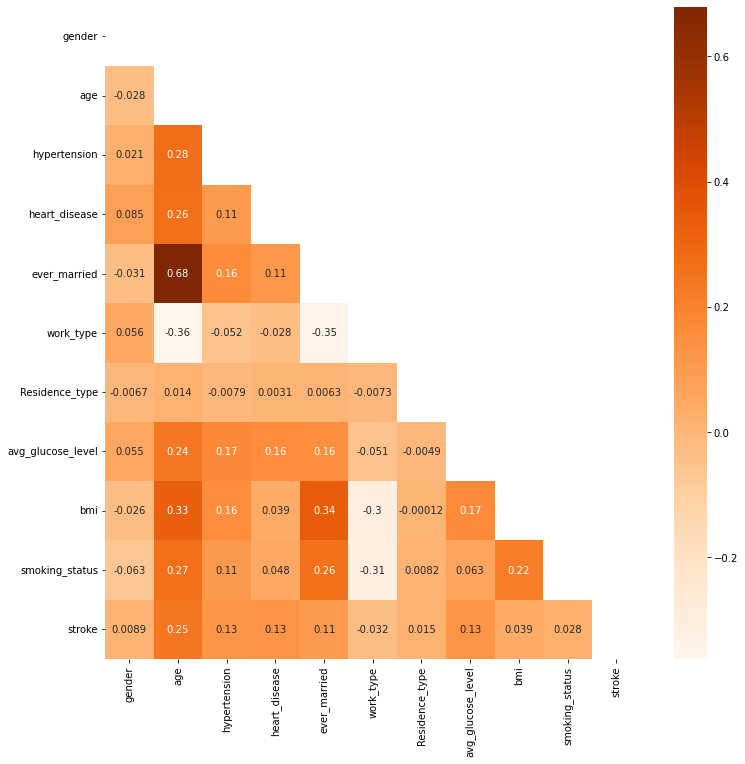

In [62]:
plt.figure(figsize=(12,12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df.corr(),cbar=True, annot=True,mask=mask,cmap='Oranges')

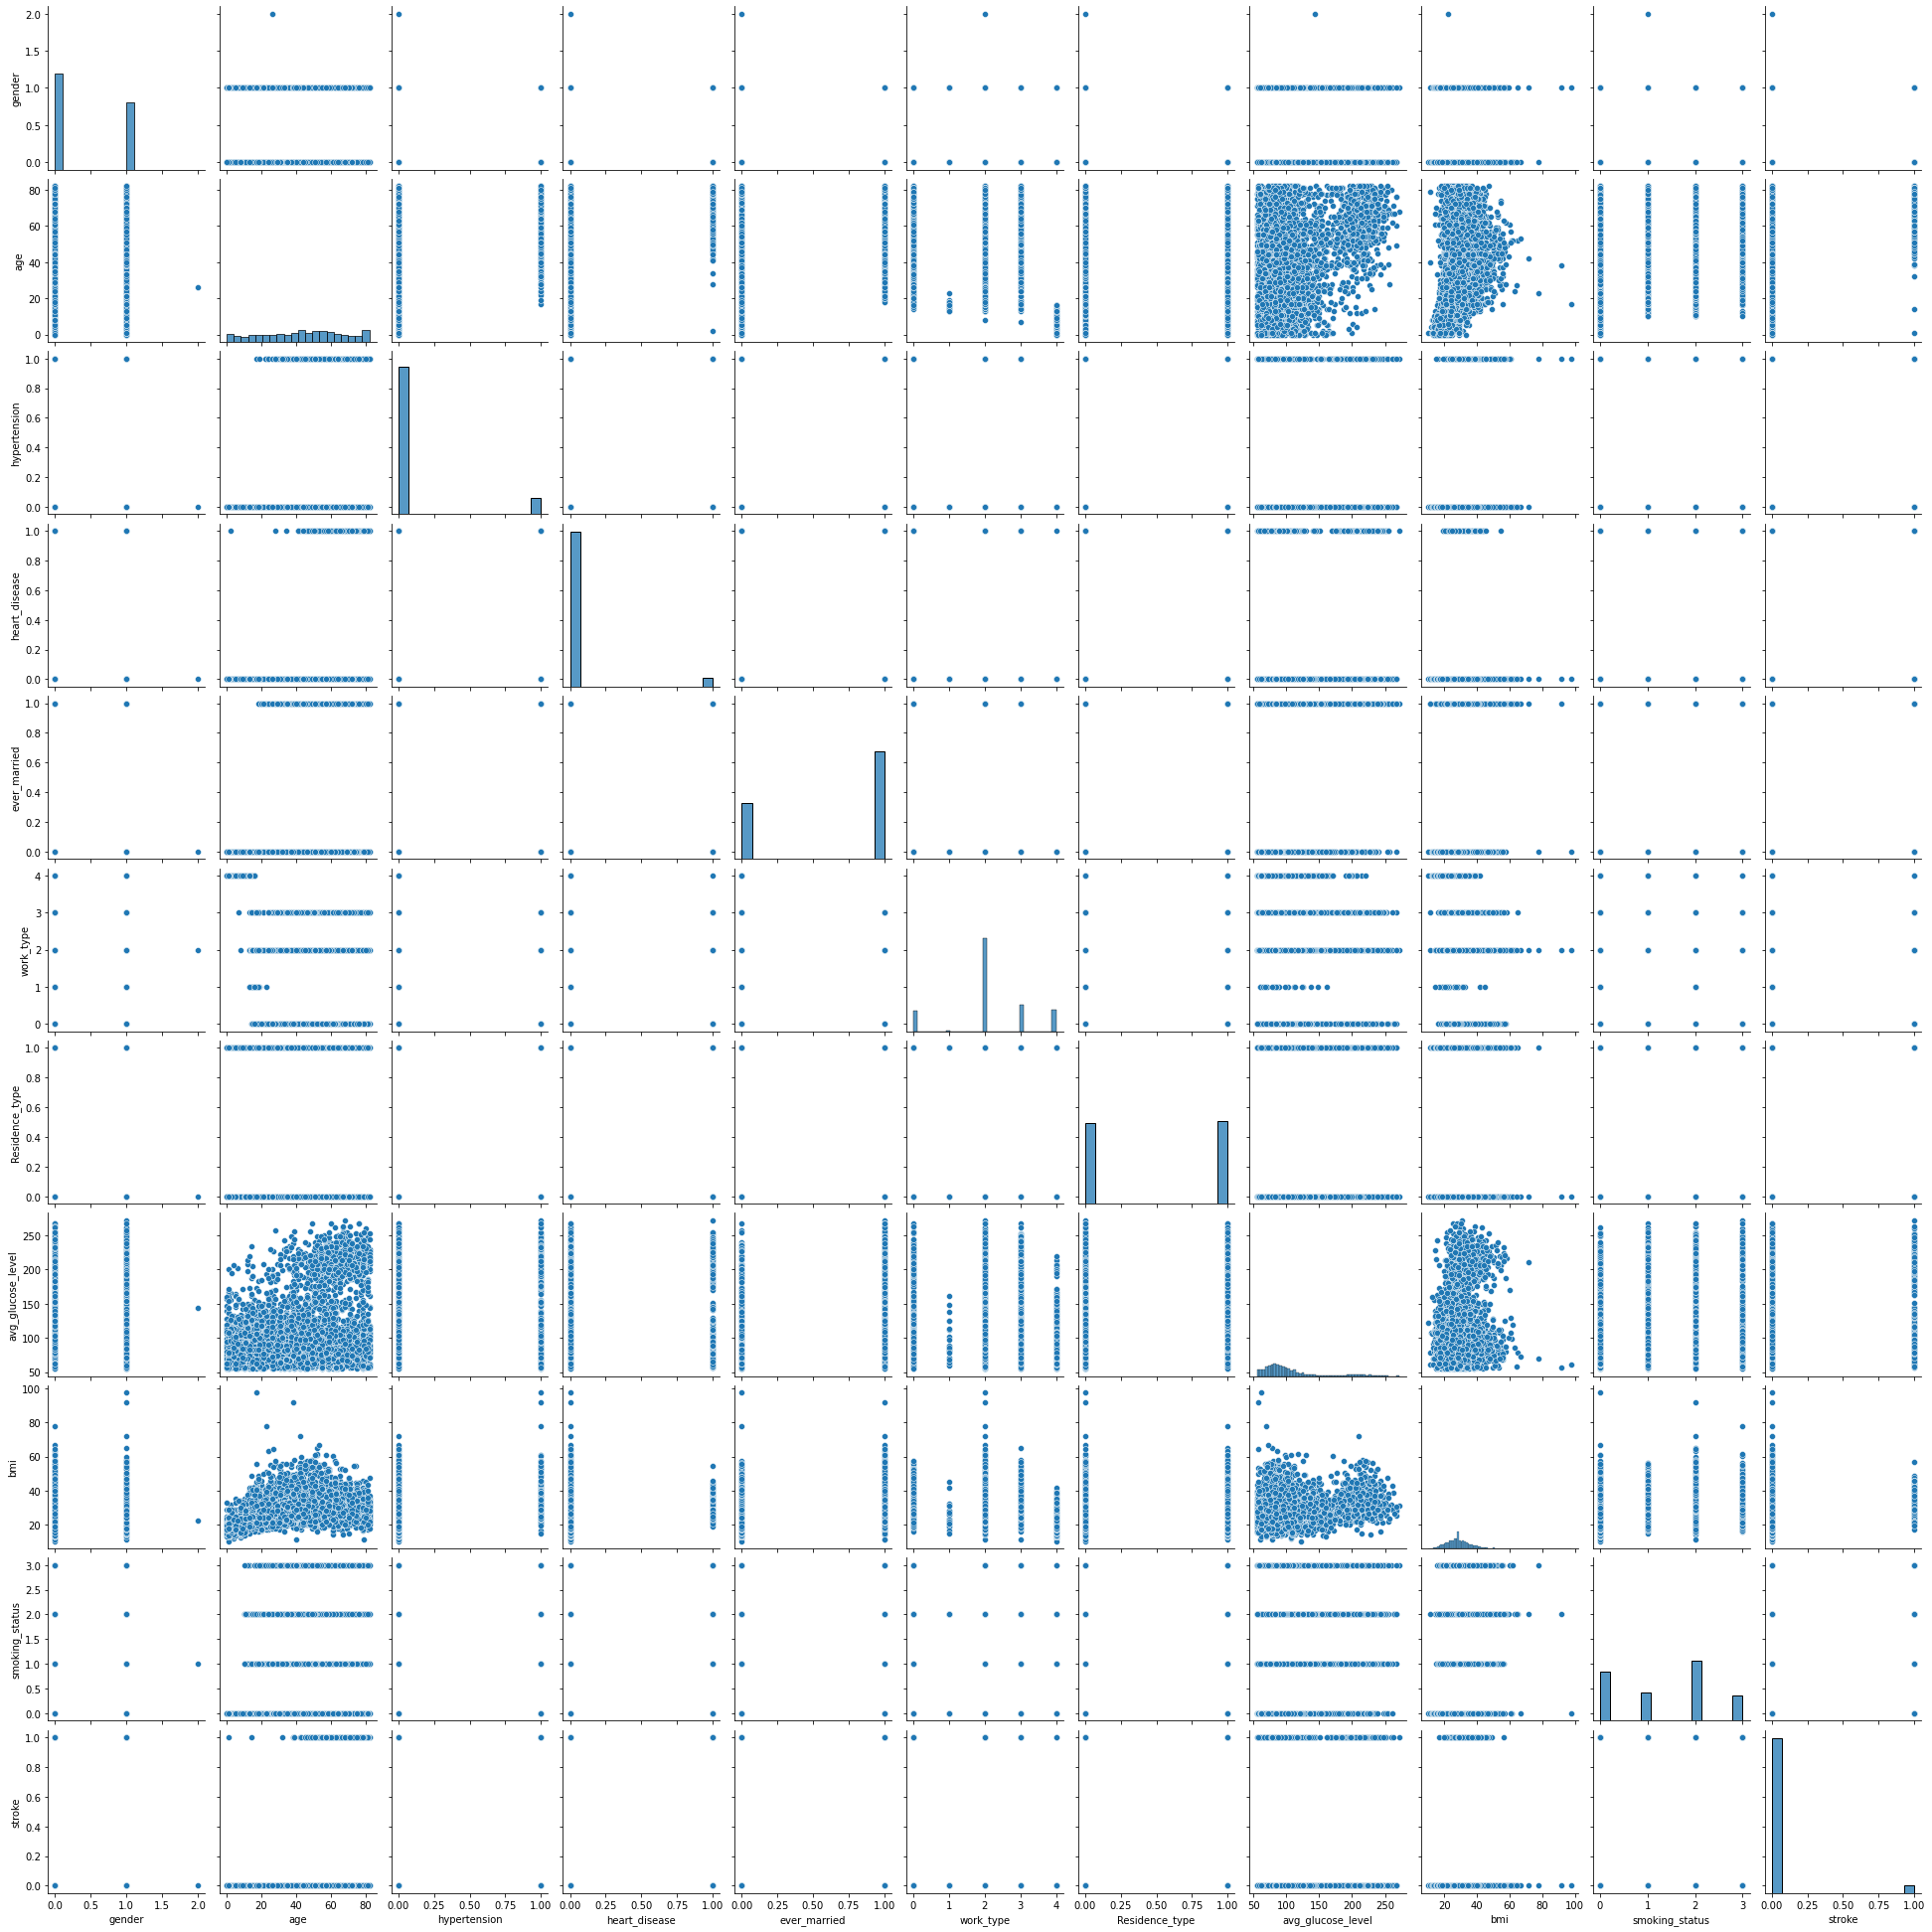

In [63]:
## Visualise the data points

# visualise features in pairs
sns.pairplot(df)
plt.show()

<h1>4.Split The Dataset for Machine Learning</h1>

In [64]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4088, 10)
Number transactions y_train dataset:  (4088,)
Number transactions X_test dataset:  (1022, 10)
Number transactions y_test dataset:  (1022,)


<h1>Applying Smote</h1>

In [66]:
print('Before OverSampling, the shape of train_x: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {}'.format(y_train.shape))

print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, the shape of train_x: (4088, 10)
Before OverSampling, the shape of train_y: (4088,)
Before OverSampling, counts of label 1: 199
Before OverSampling, counts of label 0: 3889 



In [67]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (7778, 10)
After OverSampling, the shape of train_y: (7778,)
After OverSampling, counts of label 1: 3889
After OverSampling, counts of label 0: 3889


<h1>Decision Tree</h1>

In [68]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle=True)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_res, y_train_res)
results = cross_val_score(dt_model, X_train_res, y_train_res, cv = kfold)
print('Decision Tree, Cross-Validation mean: %.4f' % results.mean())

Decision Tree, Cross-Validation mean: 0.9167


<h1>Decision Tree With Bagging</h1>

In [69]:
num_trees = 100
bc_model = BaggingClassifier(base_estimator = dt_model, n_estimators = num_trees, random_state = 7)
bc_model.fit(X_train_res, y_train_res)
results = cross_val_score(bc_model, X_train_res, y_train_res, cv = kfold)
print('DT Bagging, Cross-Validation mean: %.4f' % results.mean())

DT Bagging, Cross-Validation mean: 0.9428


<h1>Random Forest</h1>

In [70]:
rdf_model = RandomForestClassifier()
rdf_model.fit(X_train_res, y_train_res)
results = cross_val_score(rdf_model, X_train_res, y_train_res, cv = kfold)
print('Random Forest, Cross-Validation mean: %.4f' % results.mean())

Random Forest, Cross-Validation mean: 0.9466


In [71]:
ab_model = AdaBoostClassifier(base_estimator=rdf_model,n_estimators = 70)
ab_model.fit(X_train_res, y_train_res)
ab_results = cross_val_score(ab_model, X_train_res, y_train_res, cv = kfold)
print('RF AdaBoost, Cross-Validation mean: %.4f' % results.mean())

RF AdaBoost, Cross-Validation mean: 0.9466


In [72]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_res, y_train_res)
xgb_results = cross_val_score(xgb_model, X_train_res, y_train_res, cv = kfold)
print('XG Boost, Cross-Validation mean: %.4f' % results.mean())

[09:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost, Cross-Validation mean: 0.9466


<h1>Verify and Evaluate The Training Model</h1>

In [73]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

*****************
* Decision Tree *
*****************
Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


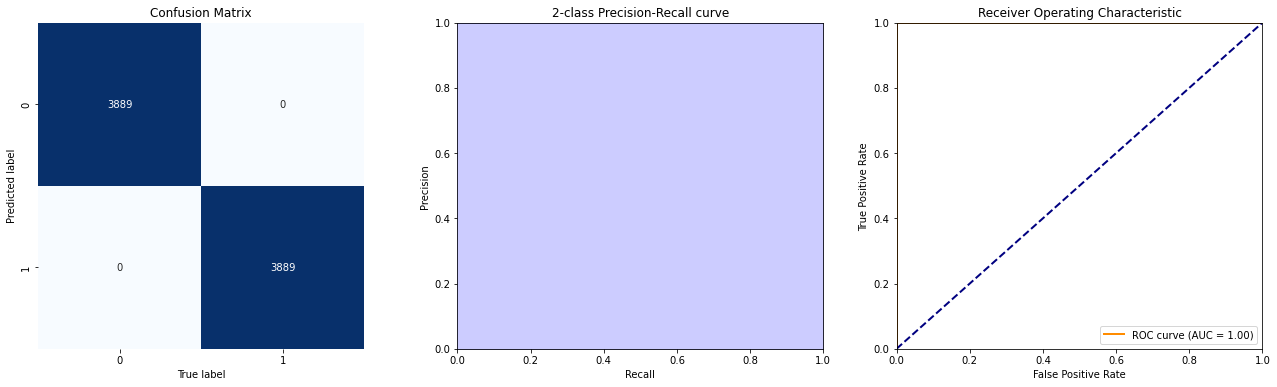


*******************************
*  Decision Tree With Bagging *
*******************************
Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


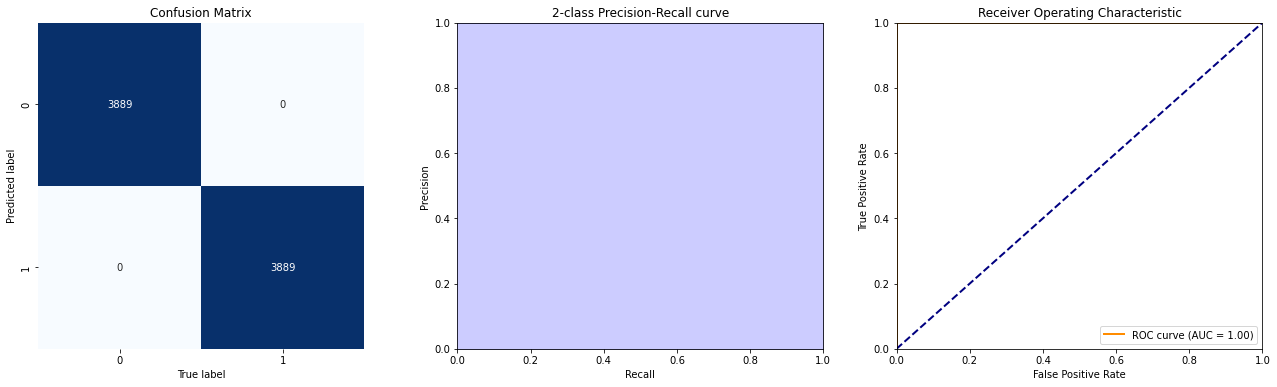


*****************
* Random Forest *
*****************
Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


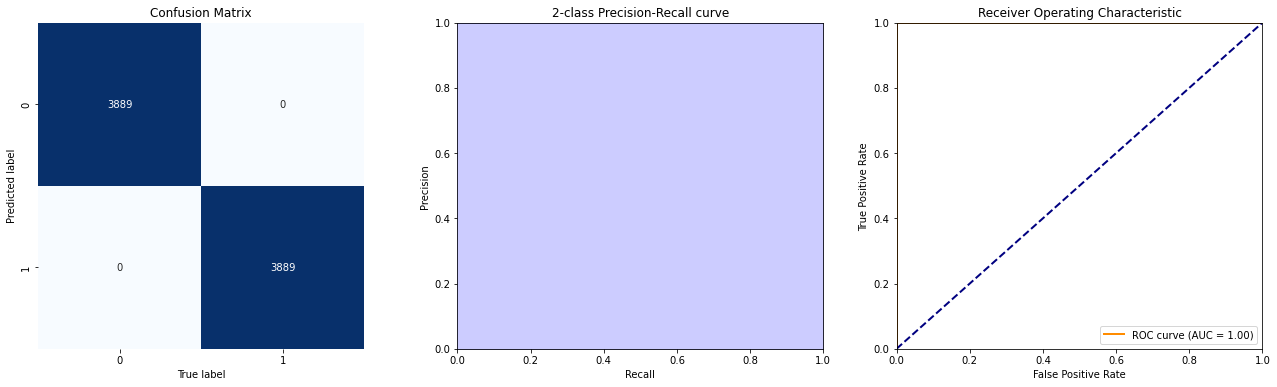


*******************************
* Random Forest With AdaBoost *
*******************************
Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


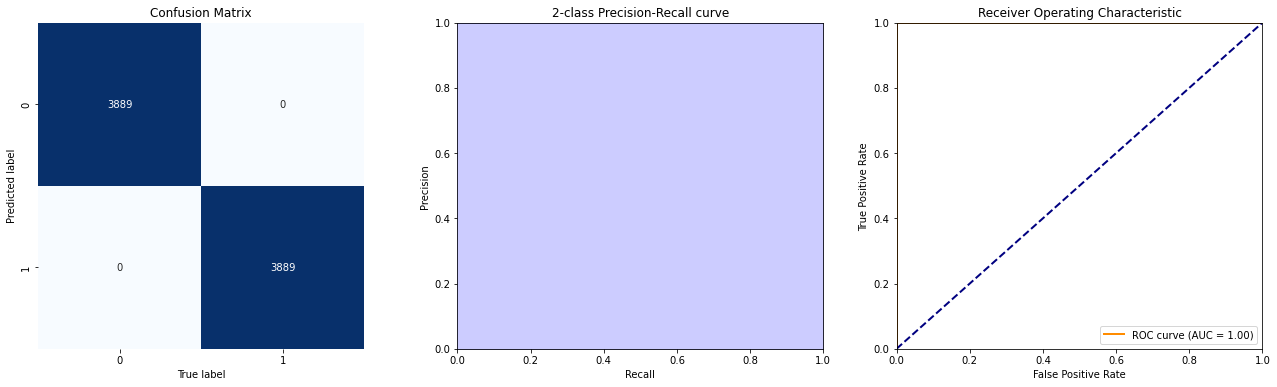


************
* XG Boost *
************
Accuracy : 0.9898 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9823 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9977 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9898                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


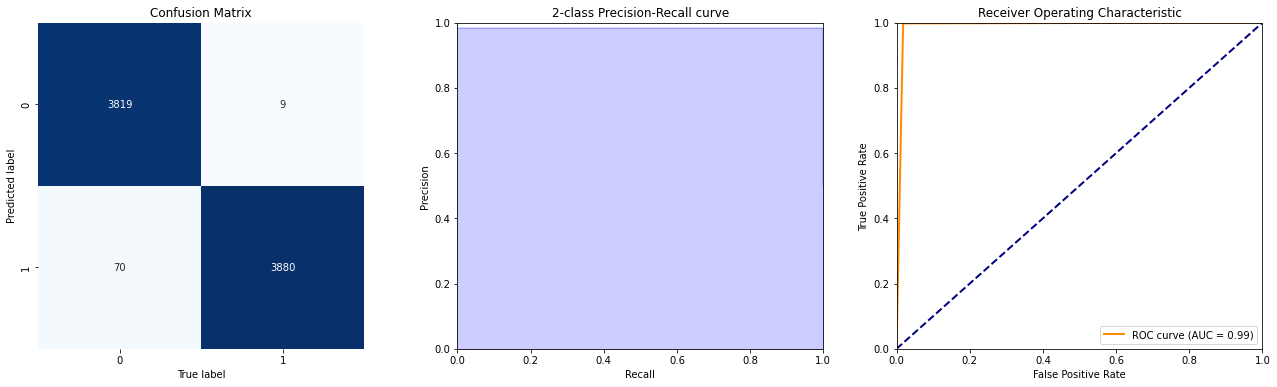

In [74]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree',' Decision Tree With Bagging','Random Forest','Random Forest With AdaBoost','XG Boost']
for i, m in enumerate([dt_model,bc_model, rdf_model, ab_model, xgb_model]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_train_res)
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train_res, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

In [75]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Decision Tree,1.000000,1.000000,1.000000,1.000000
1,Decision Tree With Bagging,1.000000,1.000000,1.000000,1.000000
2,Random Forest,1.000000,1.000000,1.000000,1.000000
3,Random Forest With AdaBoost,1.000000,1.000000,1.000000,1.000000
4,XG Boost,0.989843,0.982278,0.997686,0.989843
